In [90]:
def generate_dummies(df, dummy_column):
    dummies = pd.get_dummies(df[dummy_column], prefix=dummy_column)
    df = pd.concat([df, dummies], axis=1)
    return df

In [91]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LinearRegression

import xgboost as xgb
#from sklearn.model_selection import GridSearchCV

In [92]:
import pandas as pd

train = pd.read_csv('C:/Users/ringa/Downloads/0210/train.tsv',sep='\t')
test  = pd.read_csv('C:/Users/ringa/Downloads/0210/test.tsv',sep='\t')
train.head()

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [93]:
category_features = ['season',"yr",  'mnth', 'hr','holiday', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']
remove_features = ['atemp',"id","dteday","yr"]
target = ['cnt']
features= category_features + number_features

In [94]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8645 entries, 0 to 8644
Data columns (total 15 columns):
id            8645 non-null int64
dteday        8645 non-null object
season        8645 non-null int64
yr            8645 non-null int64
mnth          8645 non-null int64
hr            8645 non-null int64
holiday       8645 non-null int64
weekday       8645 non-null int64
workingday    8645 non-null int64
weathersit    8645 non-null int64
temp          8645 non-null float64
atemp         8645 non-null float64
hum           8645 non-null float64
windspeed     8645 non-null float64
cnt           8645 non-null int64
dtypes: float64(4), int64(10), object(1)
memory usage: 1013.2+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000218709C8448>,
      dtype=object)

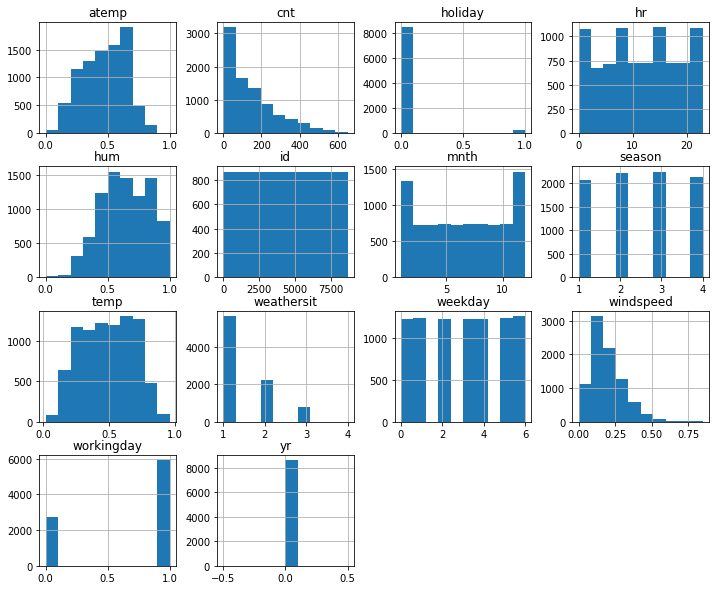

In [95]:
train.hist(figsize=(12,10))

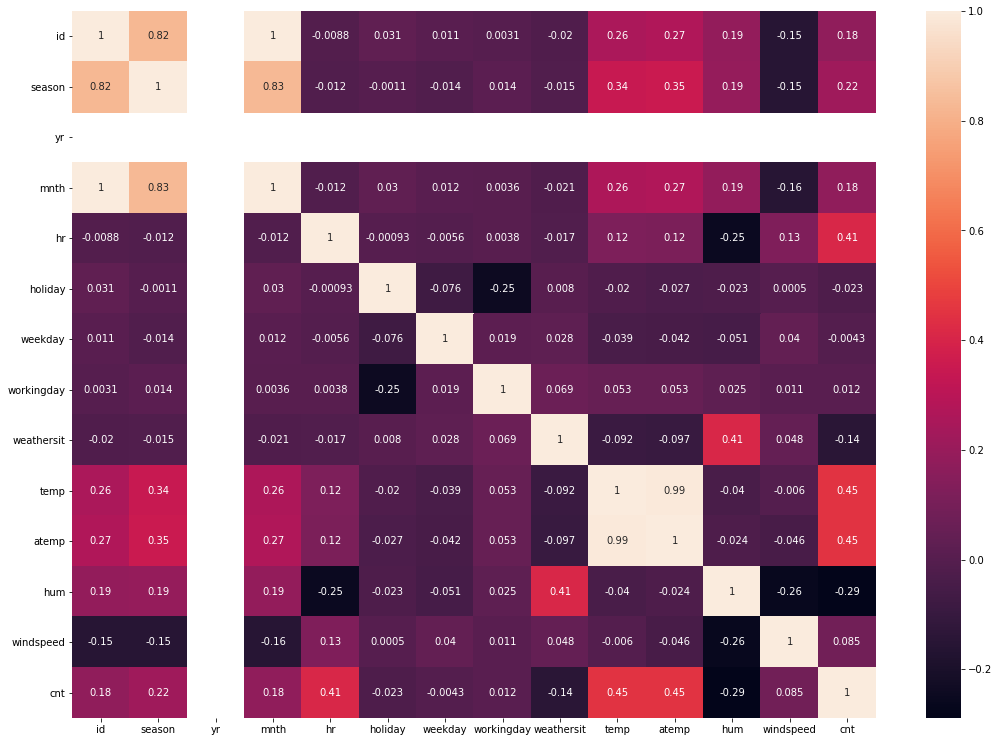

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18,13))
sns.heatmap(train.corr(), annot=True)

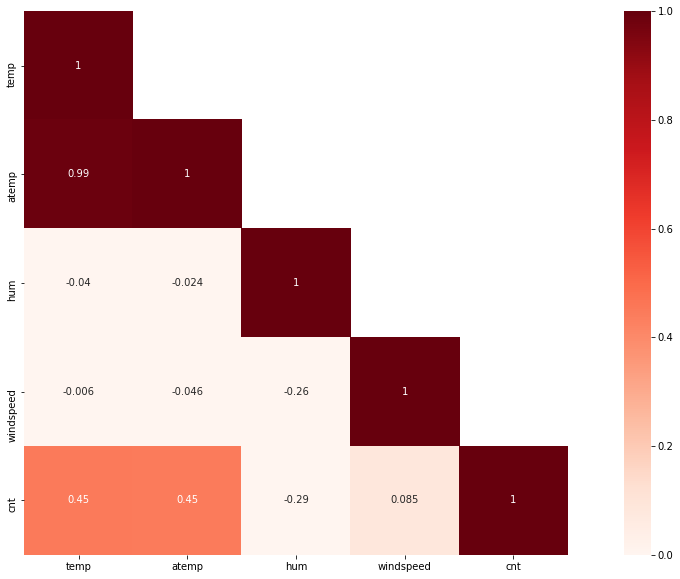

In [97]:
import numpy as np

matrix = train[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(matrix, mask=heat,vmax=1.0, vmin=0.0, square=True,annot=True, cmap="Reds")

In [98]:
X = pd.DataFrame.copy(train)
y = X[target]

for dummy_column in category_features:
    X = generate_dummies(X, dummy_column)
 

X = X.drop(category_features+target+remove_features, axis=1)


from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, random_state = 22, test_size = 0.2)

In [99]:
X.head()

,temp,hum,windspeed,season_1,season_2,season_3,season_4,yr_0,mnth_1,mnth_2,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,0.24,0.81,0.0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
1,0.22,0.80,0.0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
2,0.22,0.80,0.0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
3,0.24,0.75,0.0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0
4,0.24,0.75,0.0,1,0,0,0,1,1,0,...,0,0,0,1,1,0,1,0,0,0




int(len(train)*0.8)
y_train = train[int(len(train)*0.8):len(train)]
x_train = train[0:int(len(train)*0.8)]
# Sort validation set for plots
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values


In [100]:
from prettytable import PrettyTable
table = PrettyTable()
table.field_names = ["Model", "MSE", "R-sq"]

In [101]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [102]:

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, n_estimators=300),
    xgb.XGBRegressor(),
    LinearRegression(),
    lgb.LGBMRegressor(num_leaves=80)
]

for model in models:
    model.fit(x_train, y_train) 
    y_res = model.predict(x_val)
    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)    
    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])

print(table)

C:\Users\ringa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ringa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ringa\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\ringa\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:399: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ),

+-----------------------+----------+------+
|         Model         |   MSE    | R-sq |
+-----------------------+----------+------+
|      SGDRegressor     | 5481.74  | 0.69 |
|         Lasso         | 5499.08  | 0.69 |
|       ElasticNet      | 14909.61 | 0.16 |
|         Ridge         | 5469.61  | 0.69 |
|          SVR          | 7090.68  | 0.60 |
|          SVR          | 16089.09 | 0.10 |
|    BaggingRegressor   | 1747.97  | 0.90 |
|    BaggingRegressor   | 10249.85 | 0.42 |
|         NuSVR         | 16346.56 | 0.08 |
| RandomForestRegressor | 1553.61  | 0.91 |
|      XGBRegressor     | 1458.57  | 0.92 |
|    LinearRegression   | 5469.61  | 0.69 |
|     LGBMClassifier    | 23142.50 | 0.00 |
+-----------------------+----------+------+


In [261]:

table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSLE', "R-sq"]


model = RandomForestRegressor( random_state=0, n_estimators=100)
model.fit(x_train, y_train) 

def evaluate(x, y, dataset):
    pred = model.predict(x)
    mse = mean_squared_error(y, pred)
    score = model.score(x, y)    
    rmsle = np.sqrt(mean_squared_log_error(y, pred))
    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(rmsle, '.2f'), format(score, '.2f')])
    
evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)

+-----------------------+------------+--------+-------+----------+
|         Model         |  Dataset   |  MSE   | RMSLE | R² score |
+-----------------------+------------+--------+-------+----------+
| RandomForestRegressor |  training  | 183.44 |  0.15 |   0.99   |
| RandomForestRegressor | validation | 191.76 |  0.20 |   0.98   |
+-----------------------+------------+--------+-------+----------+


In [271]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
model = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=0)
# Fit the random search model
model.fit(x_train, y_train)
print(model)

# Table setup
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", 'RMSLE', "R² score"]

evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

print(table)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.9s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   2.0s
[CV] n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=40, bootstrap=True, total=   1.9s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   8.5s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True, total=   8.4s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=90, bootstrap=True 
[CV]  n_estimators=1200, min

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 51.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [273]:
model.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 200}

In [0]:
#search.best_params_

In [278]:
rf = RandomForestRegressor(bootstrap= True,
 max_depth=20,
 max_features='auto',
 min_samples_leaf=2,
 min_samples_split=5,
 n_estimators=200)
rf.fit(x_train, y_train) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=20, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=5, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')

In [0]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [281]:
# Print the feature ranking
print("Feature ranking:")

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, features[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature hr (0.732045)
2. feature workingday (0.080602)
3. feature temp (0.074340)
4. feature hum (0.035186)
5. feature weathersit (0.029808)
6. feature weekday (0.013810)
7. feature season (0.012840)
8. feature windspeed (0.011092)
9. feature mnth (0.008596)
10. feature holiday (0.001681)


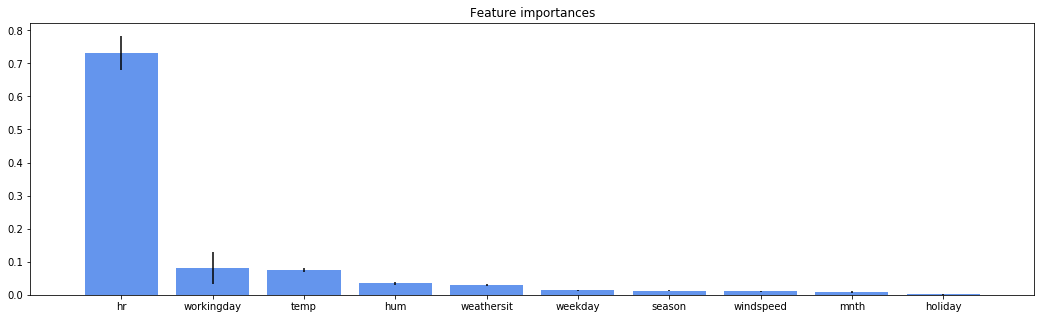

In [282]:
# Plot the feature importances of the forest
plt.figure(figsize=(18,5))
plt.title("Feature importances")
plt.bar(range(x_val.shape[1]), importances[indices], color="cornflowerblue", yerr=std[indices], align="center")
plt.xticks(range(x_val.shape[1]), [features[i] for i in indices])
plt.xlim([-1, x_val.shape[1]])
plt.show()

In [285]:
train = pd.read_csv('train.tsv',sep='\t')
test  = pd.read_csv('test.tsv',sep='\t')
train.head()

,id,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


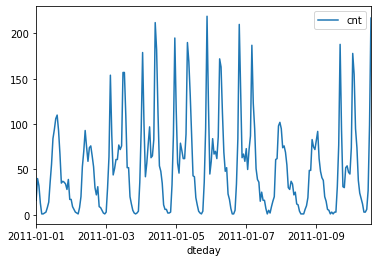

In [286]:
train[:24*10].plot(x='dteday', y='cnt')

In [287]:

dummy_fields = ['season', 'weathersit', 'mnth', 'hr', 'weekday']
for each in dummy_fields:
    dummies = pd.get_dummies(train[each], prefix=each, drop_first=False)
    train = pd.concat([train, dummies], axis=1)

fields_to_drop = ['dteday', 'season', 'weathersit', 
                  'weekday', 'atemp', 'mnth', 'workingday', 'hr']
data = train.drop(fields_to_drop, axis=1)
data.head()


,id,yr,holiday,temp,hum,windspeed,cnt,season_1,season_2,season_3,season_4,weathersit_1,weathersit_2,weathersit_3,weathersit_4,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,hr_0,hr_1,hr_2,hr_3,hr_4,hr_5,hr_6,hr_7,hr_8,hr_9,hr_10,hr_11,hr_12,hr_13,hr_14,hr_15,hr_16,hr_17,hr_18,hr_19,hr_20,hr_21,hr_22,hr_23,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,1,0,0,0.24,0.81,0.0,16,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,0,0,0.22,0.80,0.0,40,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0.22,0.80,0.0,32,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0.24,0.75,0.0,13,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,5,0,0,0.24,0.75,0.0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [0]:
quant_features = ['cnt', 'temp', 'hum', 'windspeed']
# Store scalings in a dictionary so we can convert back later
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [0]:
# Save data for approximately the last 21 days 
test_data = data[-21*24:]

# Now remove the test data from the data set 
data = data[:-21*24]

# Separate the data into features and targets
target_fields = ['cnt']
features, targets = data.drop(target_fields, axis=1), data[target_fields]
test_features, test_targets = test_data.drop(target_fields, axis=1), test_data[target_fields]

In [0]:
# Hold out the last 60 days or so of the remaining data as a validation set
train_features, train_targets = features[:-60*24], targets[:-60*24]
val_features, val_targets = features[-60*24:], targets[-60*24:]

In [0]:
class NeuralNetwork(object):
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Set number of nodes in input, hidden and output layers.
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # Initialize weights
        self.weights_input_to_hidden = np.random.normal(0.0, self.input_nodes**-0.5, 
                                       (self.input_nodes, self.hidden_nodes))

        self.weights_hidden_to_output = np.random.normal(0.0, self.hidden_nodes**-0.5, 
                                       (self.hidden_nodes, self.output_nodes))
        self.lr = learning_rate
        
        # Sigmoid activation function
        self.activation_function = lambda x : (1/(1+np.exp(-x)))  
                    
    def train(self, features, targets):
        ''' Train the network on batch of features and targets. 
        
            Arguments
            ---------
            
            features: 2D array, each row is one data record, each column is a feature
            targets: 1D array of target values
        
        '''
        n_records = features.shape[0]
        delta_weights_i_h = np.zeros(self.weights_input_to_hidden.shape)
        delta_weights_h_o = np.zeros(self.weights_hidden_to_output.shape)
        for X, y in zip(features, targets):
            
            final_outputs, hidden_outputs = self.forward_pass_train(X) 
            
            delta_weights_i_h, delta_weights_h_o = self.backpropagation(final_outputs, hidden_outputs, X, y, 
                                                                        delta_weights_i_h, delta_weights_h_o)
        self.update_weights(delta_weights_i_h, delta_weights_h_o, n_records)


    def forward_pass_train(self, X):
        ''' The forward pass while training 
         
            Arguments
            ---------
            X: features batch

        '''

        hidden_inputs = np.dot(X, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer

        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer
        
        return final_outputs, hidden_outputs

    def backpropagation(self, final_outputs, hidden_outputs, X, y, delta_weights_i_h, delta_weights_h_o):
        ''' The backpropagation implementation
         
            Arguments
            ---------
            final_outputs: output from forward pass
            y: target (i.e. label) batch
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers

        '''

        error = y-final_outputs # Output layer error is the difference between desired target and actual output.
        
        # The hidden layer's contribution to the error
        hidden_error = np.dot(self.weights_hidden_to_output, error)
        
        #Backpropagated error terms
        output_error_term = error * 1
        
        hidden_error_term = hidden_error * hidden_outputs * (1 - hidden_outputs)
        
        # Weight step (input to hidden)
        delta_weights_i_h += hidden_error_term * X[:,None]
        # Weight step (hidden to output)
        delta_weights_h_o += (output_error_term * hidden_outputs[:,None])
        return delta_weights_i_h, delta_weights_h_o

    def update_weights(self, delta_weights_i_h, delta_weights_h_o, n_records):
        ''' Update weights on gradient descent step
         
            Arguments
            ---------
            delta_weights_i_h: change in weights from input to hidden layers
            delta_weights_h_o: change in weights from hidden to output layers
            n_records: number of records

        '''
        # update hidden-to-output weights with gradient descent step
        self.weights_hidden_to_output += self.lr * delta_weights_h_o/n_records 

        # update input-to-hidden weights with gradient descent step
        self.weights_input_to_hidden += self.lr * delta_weights_i_h/n_records 

    def run(self, features):
        ''' Run a forward pass through the network with input features 
        
            Arguments
            ---------
            features: 1D array of feature values
        '''
        
        #Hidden layer
        hidden_inputs = np.dot(features, self.weights_input_to_hidden) # signals into hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) # signals from hidden layer
        
        #Output layer 
        final_inputs = np.dot(hidden_outputs, self.weights_hidden_to_output) # signals into final output layer
        final_outputs = final_inputs # signals from final output layer 
        
        return final_outputs

iterations = 3500
learning_rate = 0.7
hidden_nodes = 15
output_nodes = 1

In [0]:
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [293]:
network = NeuralNetwork(3, 2, 1, 0.5)
network.activation_function(0.5)

0.6224593312018546

In [294]:
import unittest

inputs = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
test_w_i_h = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
test_w_h_o = np.array([[0.3],
                       [-0.1]])

class TestMethods(unittest.TestCase):
    
    ##########
    # Unit tests for data loading
    ##########
    
    def test_data_path(self):
        # Test that file path to dataset has been unaltered
        self.assertTrue(data_path.lower() == 'train.tsv')
        
    def test_data_loaded(self):
        # Test that data frame loaded
        self.assertTrue(isinstance(train, pd.DataFrame))
    
    ##########
    # Unit tests for network functionality
    ##########

    def test_activation(self):
        network = NeuralNetwork(3, 2, 1, 0.5)
        # Test that the activation function is a sigmoid
        self.assertTrue(np.all(network.activation_function(0.5) == 1/(1+np.exp(-0.5))))

    def test_train(self):
        # Test that weights are updated correctly on training
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()
        
        network.train(inputs, targets)
        self.assertTrue(np.allclose(network.weights_hidden_to_output, 
                                    np.array([[ 0.37275328], 
                                              [-0.03172939]])))
        self.assertTrue(np.allclose(network.weights_input_to_hidden,
                                    np.array([[ 0.10562014, -0.20185996], 
                                              [0.39775194, 0.50074398], 
                                              [-0.29887597, 0.19962801]])))

    def test_run(self):
        # Test correctness of run method
        network = NeuralNetwork(3, 2, 1, 0.5)
        network.weights_input_to_hidden = test_w_i_h.copy()
        network.weights_hidden_to_output = test_w_h_o.copy()

        self.assertTrue(np.allclose(network.run(inputs), 0.09998924))

suite = unittest.TestLoader().loadTestsFromModule(TestMethods())
unittest.TextTestRunner().run(suite)

..E..
ERROR: test_data_path (__main__.TestMethods)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-294-3250843f4a70>", line 19, in test_data_path
    self.assertTrue(data_path.lower() == 'train.tsv')
NameError: name 'data_path' is not defined

----------------------------------------------------------------------
Ran 5 tests in 0.011s

FAILED (errors=1)


<unittest.runner.TextTestResult run=5 errors=1 failures=0>

In [295]:
import sys

N_i = train_features.shape[1]
network = NeuralNetwork(N_i, hidden_nodes, output_nodes, learning_rate)

losses = {'train':[], 'validation':[]}
for ii in range(iterations):
    # Go through a random batch of 128 records from the training data set
    batch = np.random.choice(train_features.index, size=128)
    X, y = train_features.iloc[batch].values, train_targets.iloc[batch]['cnt']
                             
    network.train(X, y)
    
    # Printing out the training progress
    train_loss = MSE(network.run(train_features).T, train_targets['cnt'].values)
    val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    sys.stdout.write("\rProgress: {:2.1f}".format(100 * ii/float(iterations)) \
                     + "% ... Training loss: " + str(train_loss)[:5] \
                     + " ... Validation loss: " + str(val_loss)[:5])
    sys.stdout.flush()
    
    losses['train'].append(train_loss)
    losses['validation'].append(val_loss)

Progress: 0.2% ... Training loss: 1.115 ... Validation loss: 0.955

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


Progress: 100.0% ... Training loss: 1.060 ... Validation loss: 0.934

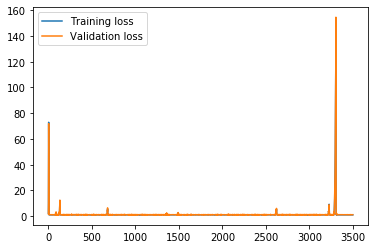

In [194]:
plt.plot(losses['train'], label='Training loss')
plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in exp


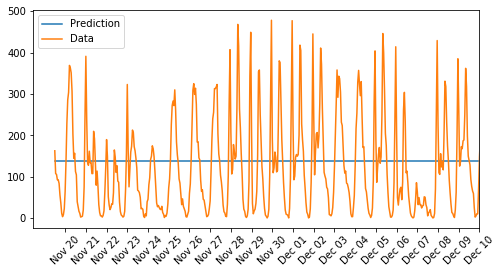

In [196]:
fig, ax = plt.subplots(figsize=(8,4))

mean, std = scaled_features['cnt']
predictions = network.run(test_features).T*std + mean
ax.plot(predictions[0], label='Prediction')
ax.plot((test_targets['cnt']*std + mean).values, label='Data')
ax.set_xlim(right=len(predictions))
ax.legend()

dates = pd.to_datetime(train.iloc[test_data.index]['dteday'])
dates = dates.apply(lambda d: d.strftime('%b %d'))
ax.set_xticks(np.arange(len(dates))[12::24])
_ = ax.set_xticklabels(dates[12::24], rotation=45)

In [0]:
#https://www.kaggle.com/saqibahmed515/predicting-bike-sharing

In [0]:
https://qiita.com/7ma7X/items/177b3021d864d82fb288
https://www.hackerearth.com/ja/practice/machine-learning/advanced-techniques/winning-tips-machine-learning-competitions-kazanova-current-kaggle-3/tutorial/
https://towardsdatascience.com/predicting-no-of-bike-share-users-machine-learning-data-visualization-project-using-r-71bc1b9a7495
https://towardsdatascience.com/demand-prediction-with-lstms-using-tensorflow-2-and-keras-in-python-1d1076fc89a0
https://medium.com/@haydarozler/time-series-forecasting-with-recurrent-neural-network-rnn-f0f7476fc063
https://github.com/haydarozler/bike-sharing-prediction-with-RNN/blob/master/BikeSharing-V3.ipynb
https://github.com/udacity/deep-learning/tree/master/first-neural-network
https://mc.ai/regression-techniques-on-a-bike-sharing-dataset/
https://medium.com/topic/data-science
https://github.com/pgebert/bike-sharing-dataset/blob/master/random_forest.py
https://www.kaggle.com/hozler/time-series-forecasting-with-rnn
https://www.kaggle.com/moriano/simple-neural-network-with-keras
https://www.kaggle.com/mayurjain/naked-neural-network-using-numpy
https://www.kaggle.com/jhotor/bikeshare-linear-regresion-model
https://www.kaggle.com/gv1994/bike-sharing-random-forest-regression-model
https://www.kaggle.com/c/bike-sharing-demand/notebooks
http://ja.voidcc.com/question/p-wousivcy-cr.html
https://arakan-pgm-ai.hatenablog.com/entry/2019/08/13/000000